# Day 4 – Handling Class Imbalance

**Goal:** Analyze and resolve imbalance in sentiment classes using oversampling techniques.


In [2]:
import pandas as pd
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


## Load Cleaned Data

We’ll load the lemmatized dataset from Day 2 (`cleaned_reviews.json`) and observe label imbalance.


In [3]:
import json

with open("../data/cleaned_reviews.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()


,clean_text,Score
0,I buy several vitality dog food product find g...,5
1,product arrived label jumbo salt peanutsthe pe...,1
2,confection around century light pillowy citrus...,4
3,look secret ingredient robitussin I believe I ...,2
4,great taffy great price wide assortment yummy ...,5


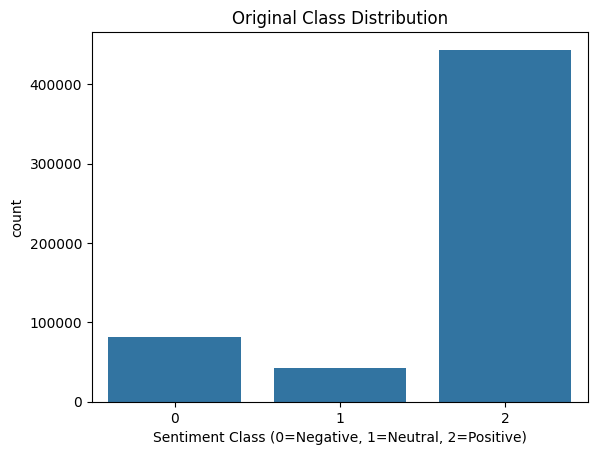

Class counts: Counter({2: 443777, 0: 82037, 1: 42640})


In [4]:
df['label'] = df['Score'].apply(lambda s: 0 if s <= 2 else 1 if s == 3 else 2)

sns.countplot(x='label', data=df)
plt.title("Original Class Distribution")
plt.xlabel("Sentiment Class (0=Negative, 1=Neutral, 2=Positive)")
plt.show()

print("Class counts:", Counter(df['label']))


## Apply Random Oversampling

We’ll use `RandomOverSampler` from `imblearn` to balance the dataset.


In [5]:
X = df['clean_text']
y = df['label']

X = X.values.reshape(-1, 1)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.DataFrame({
    'clean_text': X_resampled.ravel(),
    'label': y_resampled
})

print("Resampled Class Counts:", Counter(df_resampled['label']))


Resampled Class Counts: Counter({2: 443777, 0: 443777, 1: 443777})


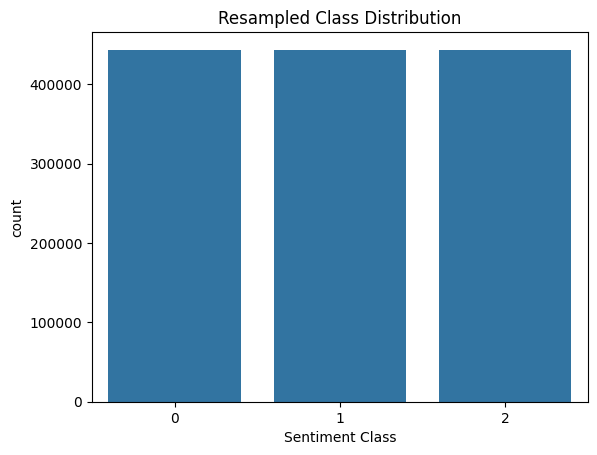

In [6]:
sns.countplot(x='label', data=df_resampled)
plt.title("Resampled Class Distribution")
plt.xlabel("Sentiment Class")
plt.show()


## Save Resampled Data

We’ll save the oversampled dataset as `augmented_reviews.csv`.


In [7]:
df_resampled.to_csv("../data/augmented_reviews.csv", index=False)
print("✅ Saved: data/augmented_reviews.csv")


✅ Saved: data/augmented_reviews.csv


## ✅ Summary

- Identified class imbalance in original data
- Balanced the dataset using `RandomOverSampler`
- Saved the new balanced dataset for downstream modeling
